<a href="https://colab.research.google.com/github/Rhodham96/LGG-Thomas5/blob/Robin/PersonalProjects/CNN/CNN_imageRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Recognizer -> CNN

In [1]:
!pip install wget # Install the wget package for file download
!pip install cv2
!pip install torch
!pip install torchvision


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=0a179ff2ae408f3bac5f6baf9333fe5b0c63da86e5e500ae2a9a6e9d6591c189
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta

In [2]:
#
#import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
import torch
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import zipfile
import pathlib
import os
import wget
import random
import shutil
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.11/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [5]:
import urllib.request
from pathlib import Path

# 1. Download the Bike zip file
bike_zip_url = "https://github.com/Rhodham96/LGG-Thomas5/raw/Robin/PersonalProjects/CNN/Bike.zip"
bike_zip_path = Path("/content/datasets/Bike.zip")

os.makedirs("/content/datasets/", exist_ok=True)
# Download the file
urllib.request.urlretrieve(bike_zip_url, bike_zip_path)

# 2. Extract the Bike zip file
extracted_dir = Path("/content/datasets/Train")
with zipfile.ZipFile(bike_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)


In [6]:
# 1. Download the Car zip file
car_zip_url = "https://github.com/Rhodham96/LGG-Thomas5/raw/Robin/PersonalProjects/CNN/Car.zip"
car_zip_path = Path("/content/datasets/Car.zip")

os.makedirs("/content/datasets/", exist_ok=True)
# Download the file
urllib.request.urlretrieve(car_zip_url, car_zip_path)

# 2. Extract the Bike zip file
extracted_dir = Path("/content/datasets/Train")
with zipfile.ZipFile(car_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

In [7]:
data_dir = pathlib.Path("/content/datasets/Train")
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

4210


In [8]:
import random
# Define the source and target directories
source_dir = '/content/datasets/Train/Bike'
target_dir = '/content/datasets/Val/Bike'

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Get all files in the source directory
all_files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

# Randomly select 400 files from the list
selected_files = random.sample(all_files, 435)

# Move the selected files to the target directory
for file in selected_files:
    src_file = os.path.join(source_dir, file)
    tgt_file = os.path.join(target_dir, file)

    # Move the file
    shutil.move(src_file, tgt_file)

print(f"Moved {len(selected_files)} files from {source_dir} to {target_dir}")

# Define the source and target directories
source_dir = '/content/datasets/Train/Car'
target_dir = '/content/datasets/Val/Car'

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Get all files in the source directory
all_files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

# Randomly select 400 files from the list
selected_files = random.sample(all_files, 435)

# Move the selected files to the target directory
for file in selected_files:
    src_file = os.path.join(source_dir, file)
    tgt_file = os.path.join(target_dir, file)

    # Move the file
    shutil.move(src_file, tgt_file)

print(f"Moved {len(selected_files)} files from {source_dir} to {target_dir}")

CarVal = '/content/datasets/dataset/CarVal'
BikeVal = '/content/datasets/dataset/BikeVal'

Moved 435 files from /content/datasets/Train/Bike to /content/datasets/Val/Bike
Moved 435 files from /content/datasets/Train/Car to /content/datasets/Val/Car


In [9]:
import random
# Define the source and target directories
source_dir = '/content/datasets/Train/Bike'
target_dir = '/content/datasets/Test/Bike'

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Get all files in the source directory
all_files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

# Randomly select 400 files from the list
selected_files = random.sample(all_files, 10)

# Move the selected files to the target directory
for file in selected_files:
    src_file = os.path.join(source_dir, file)
    tgt_file = os.path.join(target_dir, file)

    # Move the file
    shutil.move(src_file, tgt_file)

print(f"Moved {len(selected_files)} files from {source_dir} to {target_dir}")

# Define the source and target directories
source_dir = '/content/datasets/Train/Car'
target_dir = '/content/datasets/Test/Car'

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Get all files in the source directory
all_files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

# Randomly select 400 files from the list
selected_files = random.sample(all_files, 10)

# Move the selected files to the target directory
for file in selected_files:
    src_file = os.path.join(source_dir, file)
    tgt_file = os.path.join(target_dir, file)

    # Move the file
    shutil.move(src_file, tgt_file)

print(f"Moved {len(selected_files)} files from {source_dir} to {target_dir}")

Test = '/content/datasets/dataset/Test'

Moved 10 files from /content/datasets/Train/Bike to /content/datasets/Test/Bike
Moved 10 files from /content/datasets/Train/Car to /content/datasets/Test/Car


In [10]:
Train_dir = pathlib.Path("/content/datasets/Train")
BikeTrain_dir = pathlib.Path("/content/datasets/Train/Bike")
CarTrain_dir = pathlib.Path("/content/datasets/Train/Car")

Val_dir = pathlib.Path("/content/datasets/Val")
BikeVal_dir = pathlib.Path("/content/datasets/Val/Bike")
CarVal_dir = pathlib.Path("/content/datasets/Val/Car")

Test_dir = pathlib.Path("/content/datasets/Test")
BikeTest_dir = pathlib.Path("/content/datasets/Test/Bike")
CarTest_dir = pathlib.Path("/content/datasets/Test/Car")

In [11]:
def remove_macosx(root_dir):
    """
    Removes all directories named '__MACOSX' and their contents
    within the specified root directory.
    """
    for root, dirs, files in os.walk(root_dir):
        for dir_name in dirs:
            if dir_name == '__MACOSX':
                dir_path = os.path.join(root, dir_name)
                print(f"Removing: {dir_path}")
                shutil.rmtree(dir_path)

# Call the function to remove '__MACOSX' directories within 'content'
content_dir = '/content' # Replace with the actual path to your 'content' directory
remove_macosx(content_dir)

Removing: /content/datasets/Train/__MACOSX


In [12]:
import os
import imghdr
import shutil  # Import shutil for file operations

def find_unsupported_images(directory):
    unsupported_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                image_type = imghdr.what(file_path)
                if image_type not in ['jpeg', 'png', 'gif', 'bmp']:
                    unsupported_files.append(file_path)
            except Exception:  # Handle potential errors during image type detection
                unsupported_files.append(file_path)
    return unsupported_files

def remove_unsupported_images(unsupported_files):
    for file_path in unsupported_files:
        print(f"Removing unsupported file: {file_path}")
        os.remove(file_path)  # Remove the unsupported file

# ... (Your existing code for loading data) ...

# Find and remove unsupported images before creating the datasets
unsupported_train_images = find_unsupported_images(Train_dir)
unsupported_val_images = find_unsupported_images(Val_dir)

remove_unsupported_images(unsupported_train_images)
remove_unsupported_images(unsupported_val_images)

print("Unsupported images in training directory:", unsupported_train_images)
print("Unsupported images in validation directory:", unsupported_val_images)

Removing unsupported file: /content/datasets/Train/Car/2025-EQS450-SEDAN-AVP-DR.webp
Removing unsupported file: /content/datasets/Train/Car/SUVs-2.webp
Removing unsupported file: /content/datasets/Train/Car/Best-5-Electric-Cars-in-UAE.webp
Removing unsupported file: /content/datasets/Train/Car/FAMILY-BANNER.webp
Removing unsupported file: /content/datasets/Train/Car/2024-AMG-GT55-COUPE-AVP-DR.webp
Removing unsupported file: /content/datasets/Train/Car/banner-02-mobile.webp
Removing unsupported file: /content/datasets/Train/Car/i20_Executive_Thumbnail_png_1719910104New_webp_1720006912.webp
Removing unsupported file: /content/datasets/Train/Car/website-final.svg
Removing unsupported file: /content/datasets/Train/Car/mspin_googcolor_medium.svg
Removing unsupported file: /content/datasets/Train/Car/Car (2).jpg
Removing unsupported file: /content/datasets/Train/Car/.DS_Store
Removing unsupported file: /content/datasets/Train/Car/680.webp
Removing unsupported file: /content/datasets/Train/Ca

<ipython-input-12-697a6989958d>:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [16]:
img_height = 200  # Set your desired image height
img_width = 200  # Set your desired image width
batch_size = 32  # Set your desired batch size

# Define your transformations (similar to TensorFlow's preprocessing)
transform = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),  # Convert image to tensor
])

# Load dataset (assuming images are organized in subfolders for each class)
train_dataset = datasets.ImageFolder(Train_dir, transform=transform)

# Create a DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

'''# Example usage: Iterating through the dataset
for images, labels in dataloader:
    print(images.shape)  # Example: torch.Size([32, 3, 256, 256])
    print(labels)
    break  # Just show the first batch'''

# Load dataset (assuming images are organized in subfolders for each class)
val_dataset = datasets.ImageFolder(Val_dir, transform=transform)

# Create a DataLoader
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

# Load dataset (assuming images are organized in subfolders for each class)
test_dataset = datasets.ImageFolder(Test_dir, transform=transform)

# Create a DataLoader
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

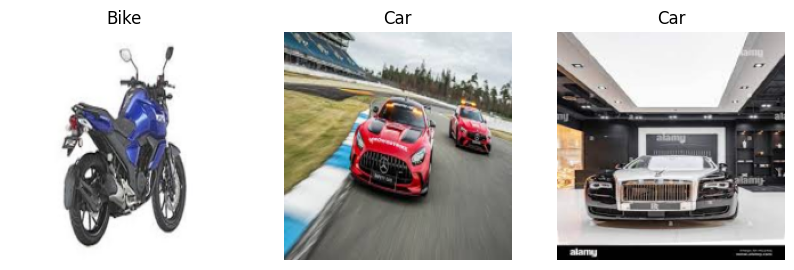

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming dataloader and class_names are set up as per the previous PyTorch code
class_names = train_dataset.classes  # Dataset classes, as ImageFolder uses folder names

# Get a batch of images and labels from the dataloader
data_iter = iter(train_dataloader)
images, labels = next(data_iter)

# Plot the images
plt.figure(figsize=(10, 10))
for i in range(3):
    ax = plt.subplot(1, 3, i + 1)

    # Convert the image tensor to a NumPy array (C, H, W) -> (H, W, C)
    image = images[i].permute(1, 2, 0).cpu().numpy()  # Move to CPU before converting to NumPy

    # Method 1: Scale to [0, 255] and convert to uint8
    image = (image * 255).astype(np.uint8)

    # Method 2: Clip to [0, 1] and display as float image (if needed)
    # image = np.clip(image, 0, 1)

    # Plot image
    plt.imshow(image)

    # Get the predicted class index (no need to one-hot decode as `labels` are integers)
    predicted_class_index = labels[i].item()  # `.item()` to get Python scalar from tensor

    # Title with class name
    plt.title(class_names[predicted_class_index])
    plt.axis("off")

plt.show()

In [26]:
class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.features = nn.Sequential(
            # Rescaling is handled by transforms in PyTorch (see data loading)
            nn.Conv2d(3, 128, kernel_size=4, padding=1),  # Same as padding='same'
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),  # Default stride is kernel_size
            nn.Conv2d(128, 64, kernel_size=4, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 32, kernel_size=4, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 16, kernel_size=4, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),

        )
        # Calculate the correct input size for fc1 dynamically
        with torch.no_grad():  # No need to track gradients for this calculation
            x = torch.randn(1, 3, img_height, img_width)
            x = self.features(x)  # Pass through convolutional layers to get output shape
            fc1_input_size = x.flatten(1).shape[1]  # Get the flattened output size

        self.classifier = nn.Sequential(
            nn.Flatten(), # Flatten is now within the classifier block
            nn.Linear(fc1_input_size, 64), # Input size is now calculated dynamically
            nn.ReLU(),
            nn.Linear(64, num_classes),
            nn.Softmax(dim=1)  # Softmax is applied in the model
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Assuming img_height and img_width are defined
num_classes = 2
model = CNNModel(num_classes)
print(model)

CNNModel(
  (features): Sequential(
    (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(128, 64, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 32, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(32, 16, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1936, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=2, bias=True)
    (4): Softmax(dim=1)
  )
)


In [27]:
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

criterion = nn.CrossEntropyLoss()  # No softmax in the model
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the correct device

# Initialize TensorBoard
writer = SummaryWriter("logs")

num_epochs = 10

for epoch in range(num_epochs):
    model.train()  # Set to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()
        _, predicted = outputs.max(1)  # Get predicted class
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_acc = 100 * correct / total
    train_loss = running_loss / len(train_dataloader)

    # Log to TensorBoard
    writer.add_scalar("Loss/train", train_loss, epoch)
    writer.add_scalar("Accuracy/train", train_acc, epoch)

    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {train_loss:.4f} - Accuracy: {train_acc:.2f}%")


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10 - Loss: 0.7356 - Accuracy: 53.66%
Epoch 2/10 - Loss: 0.5795 - Accuracy: 72.59%
Epoch 3/10 - Loss: 0.5084 - Accuracy: 79.48%
Epoch 4/10 - Loss: 0.4577 - Accuracy: 85.01%
Epoch 5/10 - Loss: 0.4482 - Accuracy: 85.95%
Epoch 6/10 - Loss: 0.4167 - Accuracy: 89.14%
Epoch 7/10 - Loss: 0.4082 - Accuracy: 90.23%
Epoch 8/10 - Loss: 0.4003 - Accuracy: 91.11%
Epoch 9/10 - Loss: 0.3892 - Accuracy: 92.14%
Epoch 10/10 - Loss: 0.3831 - Accuracy: 92.99%


In [28]:
from torchsummary import summary
summary(model, (3, img_height, img_width))  # Assuming RGB images

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 128, 199, 199]           6,272
              ReLU-2        [-1, 128, 199, 199]               0
         MaxPool2d-3          [-1, 128, 99, 99]               0
            Conv2d-4           [-1, 64, 98, 98]         131,136
              ReLU-5           [-1, 64, 98, 98]               0
         MaxPool2d-6           [-1, 64, 49, 49]               0
            Conv2d-7           [-1, 32, 48, 48]          32,800
              ReLU-8           [-1, 32, 48, 48]               0
         MaxPool2d-9           [-1, 32, 24, 24]               0
           Conv2d-10           [-1, 16, 23, 23]           8,208
             ReLU-11           [-1, 16, 23, 23]               0
        MaxPool2d-12           [-1, 16, 11, 11]               0
          Flatten-13                 [-1, 1936]               0
           Linear-14                   

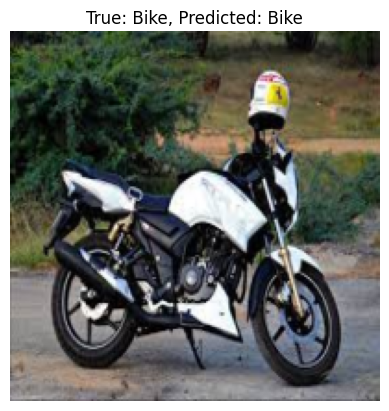

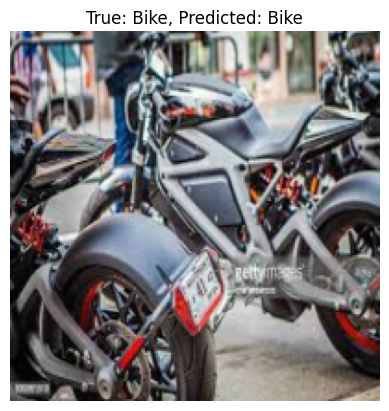

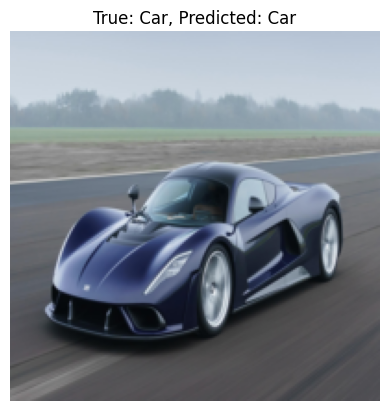

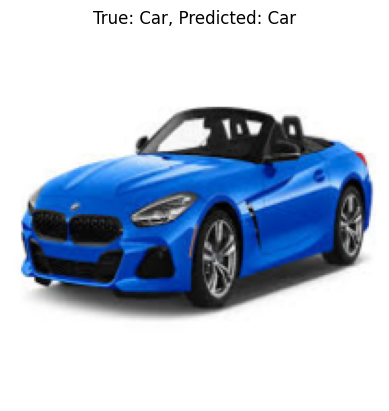

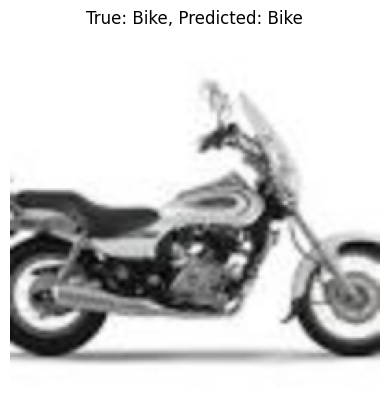

In [29]:
# Move model to evaluation mode
model.eval()

# Move model to the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Get a batch of test data
test_images, test_labels = next(iter(test_dataloader))  # Fetch one batch
test_images, test_labels = test_images.to(device), test_labels.to(device)

# Select 5 random images from the batch
random_indices = random.sample(range(len(test_images)), 5)

for i in random_indices:
    # Get the image and true label
    image = test_images[i].cpu().permute(1, 2, 0).numpy()  # Convert to NumPy and reshape
    true_label = test_labels[i].item()

    # Make a prediction
    with torch.no_grad():  # No gradient computation
        prediction = model(test_images[i].unsqueeze(0))  # Add batch dimension
    predicted_label = torch.argmax(prediction, dim=1).item()

    # Display the image with prediction
    plt.figure()
    plt.imshow(image)
    plt.title(f"True: {train_dataset.classes[true_label]}, Predicted: {train_dataset.classes[predicted_label]}")
    plt.axis('off')
    plt.show()

In [43]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

# Define a hook to capture feature maps
activation = {}

def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()  # Store the output of the layer
    return hook

# Function to visualize feature maps
def display_image_filtered(name_image, model, layer_name, image):
    # Apply transforms (resize and convert to tensor)
    transform = transforms.Compose([
        transforms.Resize((200, 200)),
        transforms.ToTensor()
    ])
    input_img = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    # Hook into the model to get activations
    layer = getattr(model, layer_name.split('.')[0])[int(layer_name.split('.')[1])]
    print(f"Layer {layer_name}: {type(layer)}")
    hook_handle = layer.register_forward_hook(get_activation(layer_name))  # Attach hook

    with torch.no_grad():
        model(input_img)  # Forward pass to get activations

    # Check if feature_maps is not empty before proceeding
    if layer_name not in activation:
        print(f"Warning: No activation found for layer {layer_name}. Skipping visualization.")
        return

    feature_maps = activation[layer_name].cpu().squeeze(0)  # Remove batch dimension
    print(f"Feature map 0 shape: {feature_maps[0].shape if feature_maps.numel() > 0 else 'Empty'}")  # Debugging shape of first feature map

    if feature_maps.numel() == 0:  # Check if tensor is empty
        print(f"Warning: {layer_name} produced an empty output. Skipping visualization.")
        return  # Exit function to avoid errors

    # Check if the feature maps have the correct shape
    if feature_maps.ndimension() < 2:  # Should be at least 2D (height x width)
        print(f"Warning: Feature maps from {layer_name} are not in the expected format. Skipping.")
        return

    dim = feature_maps.shape[0]
    print(f'{layer_name} | Features Shape: {feature_maps.shape}')
    print(f'Dimension {dim}')

    # Calculate grid size
    grid_size = int(np.ceil(np.sqrt(dim)))

    # Create results folder
    results_path = f'results_{name_image}'
    os.makedirs(results_path, exist_ok=True)
    print(f"Feature maps shape: {feature_maps.shape}")

    # Plot feature maps
    fig = plt.figure(figsize=(30, 30))
    for i in range(dim):
        ax = fig.add_subplot(grid_size, grid_size, i + 1)
        ax.axis('off')

        # Make sure to use an appropriate colormap or normalize the values
        ax.imshow(feature_maps[i].cpu().numpy(), cmap='viridis')  # Assuming feature_maps[i] is a 2D tensor
        plt.imsave(f'{results_path}/{name_image}_{layer_name}_{i}.jpg', feature_maps[i].cpu().numpy(), cmap='viridis')

    # Remove the hook
    hook_handle.remove()

# Load model and set to evaluation mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

num = 0
for name in ['Car', 'Bike']:
    image_path = f"/content/datasets/Test/Bike/Bike (114).jpg" if name == 'Bike' else f"/content/datasets/Test/Car/Car (652).jpeg"

    image = Image.open(image_path).convert("RGB")  # Open image with PIL

    # Display the original image
    plt.axis('off')
    plt.imshow(image)
    plt.show()

    for i in range(4):
        if num == 0 and i == 0:
            print('-----------------------------------------------------')
            print(f'{i+1}st Convolutional Layer')
            display_image_filtered(name, model, 'features.0', image) # Access the first layer in features using index 0
            print('--------')
            print(f'{i+1}nd Pooling Layer')
            display_image_filtered(name, model, 'features.2', image) # Access the third layer (pooling) in features
            print('-----------------------------------------------------')
        else:
            print('-----------------------------------------------------')
            print(f'{i+1}st Convolutional Layer')
            display_image_filtered(name, model, f'features.{num + 2*i}', image) # Access convolutional layers by their index
            print('--------')
            print(f'{i+1}nd Pooling Layer')
            display_image_filtered(name, model, f'features.{num + 2*i + 2}', image) # Access pooling layers
            print('-----------------------------------------------------')

Output hidden; open in https://colab.research.google.com to view.

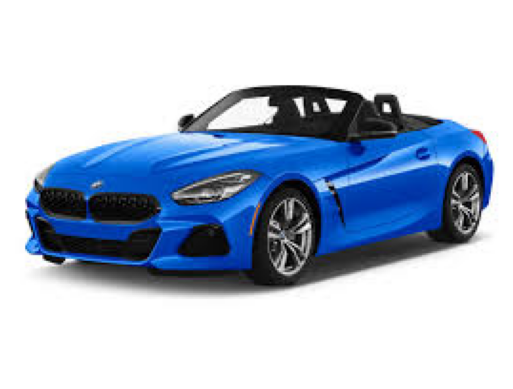

-----------------------------------------------------
1st Convolutional Layer
Layer features.0: <class 'torch.nn.modules.conv.Conv2d'>
Feature map 0 shape: torch.Size([])
features.0 | Features Shape: torch.Size([1936])
Dimension 1936
Feature maps shape: torch.Size([1936])


TypeError: Invalid shape () for image data

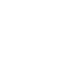

In [39]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

# Define a hook to capture feature maps
activation = {}

def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()  # Store the output of the layer
    return hook

# Function to visualize feature maps
def display_image_filtered(name_image, model, layer_name, image):
    # Apply transforms (resize and convert to tensor)
    transform = transforms.Compose([
        transforms.Resize((200, 200)),
        transforms.ToTensor()
    ])
    input_img = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    # Hook into the model to get activations
    # Get the layer by its name using getattr
    layer = getattr(model, layer_name.split('.')[0])[int(layer_name.split('.')[1])]
    # Example: getattr(model, 'features')[0] accesses the first layer in features
    print(f"Layer {layer_name}: {type(layer)}")
    hook_handle = layer.register_forward_hook(get_activation(layer_name))  # Attach hook

    with torch.no_grad():
        model(input_img)  # Forward pass to get activations

    # Check if feature_maps is not empty before proceeding
    feature_maps = activation[layer_name].cpu().squeeze(0)
    print(f"Feature map {0} shape: {feature_maps[0].shape}")  # Debug
    if feature_maps.nelement() == 0:  # Check if tensor is empty
        print(f"Warning: {layer_name} produced an empty output. Skipping visualization.")
        return  # Exit function to avoid errors

    dim = feature_maps.shape[0]
    print(f'{layer_name} | Features Shape: {feature_maps.shape}')
    print(f'Dimension {dim}')

    # Calculate grid size
    grid_size = int(np.ceil(np.sqrt(dim)))

    # Create results folder
    results_path = f'results_{name_image}'
    os.makedirs(results_path, exist_ok=True)
    print(f"Feature maps shape: {feature_maps.shape}")
    # Plot feature maps
    fig = plt.figure(figsize=(30, 30))
    for i in range(dim):
        ax = fig.add_subplot(grid_size, grid_size, i + 1)
        ax.axis('off')
        ax.imshow(feature_maps[i], cmap='viridis')
        plt.imsave(f'{results_path}/{name_image}_{layer_name}_{i}.jpg', feature_maps[i], cmap='viridis')

    # Remove the hook
    hook_handle.remove()

# Load model and set to evaluation mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

num = 0
for name in ['Car', 'Bike']:
    image_path = f"/content/datasets/Test/Bike/Bike (114).jpeg" if name == 'Bike' else f"/content/datasets/Test/Car/Car (652).jpeg"

    image = Image.open(image_path).convert("RGB")  # Open image with PIL

    # Display the original image
    plt.axis('off')
    plt.imshow(image)
    plt.show()

    for i in range(4):
        if num == 0 and i == 0:
            print('-----------------------------------------------------')
            print(f'{i+1}st Convolutional Layer')
            display_image_filtered(name, model, 'features.0', image) # Access the first layer in features using index 0
            print('--------')
            print(f'{i+1}nd Pooling Layer')
            display_image_filtered(name, model, 'features.2', image) # Access the third layer (pooling) in features
            print('-----------------------------------------------------')
        else:
            print('-----------------------------------------------------')
            print(f'{i+1}st Convolutional Layer')
            display_image_filtered(name, model, f'features.{num + 2*i}', image) # Access convolutional layers by their index
            print('--------')
            print(f'{i+1}nd Pooling Layer')
            display_image_filtered(name, model, f'features.{num + 2*i + 2}', image) # Access pooling layers
            print('-----------------------------------------------------')

conv2d | Filter Shape: (4, 4, 3, 128) Bias Shape: (128,)
Dimension 128
(4, 4, 3, 128)


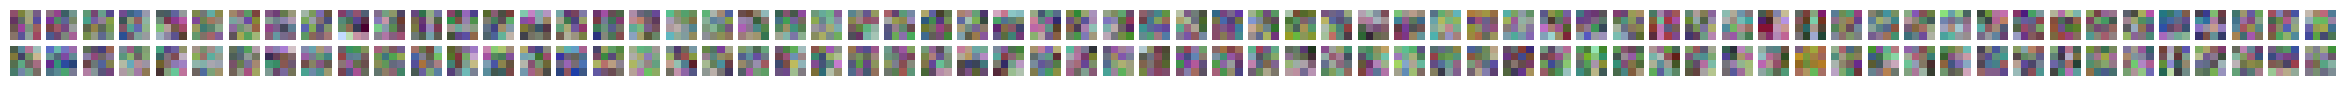

In [ ]:
def display_filter(model, layer_name):
    layer = model.get_layer(layer_name)
    filter, bias= layer.get_weights()
    dim = filter.shape[3]
    print(f'{layer_name} | Filter Shape: {filter.shape} Bias Shape: {bias.shape}')
    print(f'Dimension {dim}')
    f_min, f_max = filter.min(), filter.max()
    filter = (filter - f_min) / (f_max - f_min)
    print(filter.shape)
    fig= plt.figure(figsize=(30,30))
    for i in range(dim):
        ax = fig.add_subplot(int(dim/2),int(dim/2),i+1)
        ax.axis('off')
        try:
            ax.imshow(filter[:,:,:,i])
        except:
            ax.imshow(filter[:,:,:,i][0])

# Change the layer name here to match the actual layer name in the model
display_filter(model,'conv2d') # Changed from f'conv2d_{num}' to 'conv2d'